# Implementation of MCP Neuron for AND and OR Function.

In [1]:
def MCP_Neurons_AND(X1, X2, T):
  """
  This functions implements basic AND operations with MCP Neuron for two inputs.
  Arguments:
  Inputs:
  X1 (1 nd array): An array of binary values.
  X2 (1 nd array): An array of binary values.
  Output:
  state_neuron(1D-list): An state of neuron 1 0r 0 for the particular inputs.
  """
  assert len(X1) == len(X2)

  state_neuron = []

  for x1, x2 in zip(X1, X2):
    if(x1 + x2) >= T:
      state_neuron.append(1)
    else:
      state_neuron.append(0)
  ### YOUR CODE HERE ###
  # Perform an element wise addition of two input arrays stored in a new array(list):
  # Create a new array to put all the prediction let's name that a state_neuron.
  # Append 1 in sate_neuron if sum (element) of above list is above Threshold else append 0.

  return state_neuron

In [2]:
# Example usage for MCP_Neurons_AND function
X1 = [0, 0, 1, 1]
X2 = [0, 1, 0, 1]
T = 2  # Threshold value

# Call the MCP_Neurons_AND function
result = MCP_Neurons_AND(X1, X2, T)

# Print the result
print(f"Output of AND gate for inputs {X1} and {X2} with threshold {T}: {result}")


Output of AND gate for inputs [0, 0, 1, 1] and [0, 1, 0, 1] with threshold 2: [0, 0, 0, 1]


In [3]:
def MCP_Neurons_OR(X1, X2, T):
    """
    This function implements basic OR operations with MCP Neuron for two inputs.
    Arguments:
    Inputs:
    X1 (1D array): An array of binary values.
    X2 (1D array): An array of binary values.
    Output:
    state_neuron (1D list): The state of the neuron (1 or 0) for the particular inputs.
    """
    assert len(X1) == len(X2)

    state_neuron = []

    for x1, x2 in zip(X1, X2):
      if (x1 + x2) >= T:
        state_neuron.append(1)
      else:
        state_neuron.append(0)
    ### YOUR CODE HERE ###
    # Perform an element wise addition of two input arrays stored in a new array(list):
    # Create a new array to put all the prediction let's name that a state_neuron.
    # Append 1 in sate_neuron if sum (element) of above list is above Threshold else append 0.

    return state_neuron


In [4]:
# Example usage for MCP_Neurons_OR function
X1 = [0, 0, 1, 1]
X2 = [0, 1, 0, 1]
T = 1  # Threshold value for OR gate

# Call the MCP_Neurons_OR function
result_or = MCP_Neurons_OR(X1, X2, T)

# Print the result
print(f"Output of OR gate for inputs {X1} and {X2} with threshold {T}: {result_or}")


Output of OR gate for inputs [0, 0, 1, 1] and [0, 1, 0, 1] with threshold 1: [0, 1, 1, 1]


# Implementation for 0 Vs. 1 Classification.

## Step 1: Load the Dataset

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Load the dataset
df_0_1 = pd.read_csv("/content/mnist_0_and_1.csv")  # Add the correct file path if necessary

# Extract features and labels
X = df_0_1.drop(columns=["label"]).values  # 784 pixels
y = df_0_1["label"].values  # Labels (0 or 1)

# Check the shape of the features and labels
print("Feature matrix shape:", X.shape)
print("Label vector shape:", y.shape)


Feature matrix shape: (12665, 784)
Label vector shape: (12665,)


### Viewing the Dataset.

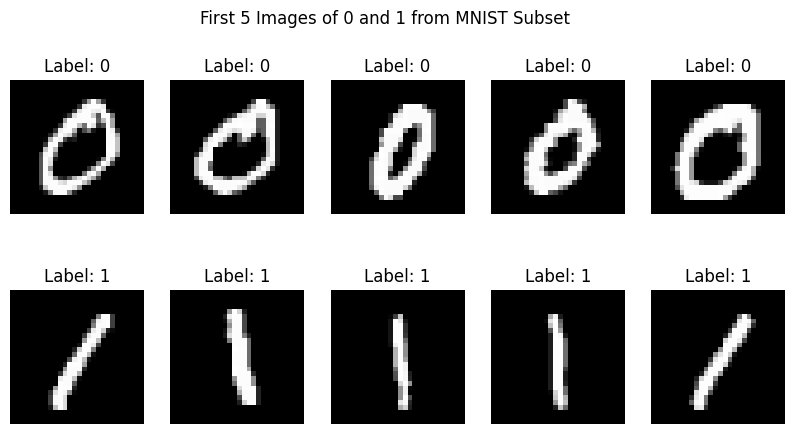

In [8]:
# Separate images for label 0 and label 1
images_0 = X[y == 0]  # Get all images with label 0
images_1 = X[y == 1]  # Get all images with label 1

fig, axes = plt.subplots(2, 5, figsize=(10, 5))

# Check if the arrays have the required amount of data
if len(images_0) < 5 or len(images_1) < 5:
    print("Error: Not enough images in images_0 or images_1 to plot 5 images.")
else:
    for i in range(5):
        # Plot digit 0
        axes[0, i].imshow(images_0[i].reshape(28, 28), cmap="gray")
        axes[0, i].set_title("Label: 0")
        axes[0, i].axis("off")
        # Plot digit 1
        axes[1, i].imshow(images_1[i].reshape(28, 28), cmap="gray")
        axes[1, i].set_title("Label: 1")
        axes[1, i].axis("off")
    plt.suptitle("First 5 Images of 0 and 1 from MNIST Subset")
    plt.show()

## Step - 2 - Initializing the Weights:

In [9]:
# Initialize weights and bias
weights = np.zeros(X.shape[1])  # 784 weights (one for each pixel)
bias = 0
learning_rate = 0.1
epochs = 100

## Step - 3 - Make a Decision function:

In [10]:
import numpy as np

def decision_function(X, weights, bias):
    """
    Compute the predicted labels for the input data.

    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - weights: Updated weights after training
    - bias: Updated bias after training

    Returns:
    - y_pred_all: The predicted labels for the input data
    """
    predictions = np.dot(X, weights) + bias
    y_pred_all = np.where(predictions >= 0, 1, 0)
    #####Your Code Here############  # Activation function (step function)
    return y_pred_all

## Step - 3 - Implement the Perceptron Learning Algorithm

In [12]:
def train_perceptron(X, y, weights, bias, learning_rate=0.1, epochs=100):
    """
    Train the perceptron using the Perceptron Learning Algorithm.

    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - y: Labels (true output) as a numpy array of shape (n_samples,)
    - weights: Initial weights as a numpy array of shape (n_features,)
    - bias: Initial bias value (scalar)
    - learning_rate: Learning rate for weight updates (default is 0.1)
    - epochs: Number of iterations to train the model (default is 100)

    Returns:
    - weights: Updated weights after training
    - bias: Updated bias after training
    - accuracy: Total correct prediction.
    """
    # Step 3: Perceptron Learning Algorithm
    # Your Code here#
    n_samples = X.shape[0]

    for epoch in range(epochs):
      correct_predictions = 0
      for i in range(n_samples):
        linear_output = np.dot(X[i], weights) + bias
        y_pred = 1 if linear_output >= 0 else 0
        if y_pred != y[i]:
          update = learning_rate * (y[i] - y_pred)
          weights += update * X[i]
          bias += update
        else:
          correct_predictions += 1
          accuracy = correct_predictions / n_samples

      if epoch % 10 == 0 or epoch == epochs - 1:
        print(f"Epoch {epoch + 1}/{epochs} - Accuracy: {accuracy:.4f}")

    return weights, bias, accuracy

## Training the Perceptron

In [13]:
# After training the model with the perceptron_learning_algorithm
weights, bias, accuracy = train_perceptron(X, y, weights, bias)

# Evaluate the model using the new function
print("The Final Accuracy is: ", accuracy)

Epoch 1/100 - Accuracy: 0.9967
Epoch 11/100 - Accuracy: 0.9995
Epoch 21/100 - Accuracy: 1.0000
Epoch 31/100 - Accuracy: 1.0000
Epoch 41/100 - Accuracy: 1.0000
Epoch 51/100 - Accuracy: 1.0000
Epoch 61/100 - Accuracy: 1.0000
Epoch 71/100 - Accuracy: 1.0000
Epoch 81/100 - Accuracy: 1.0000
Epoch 91/100 - Accuracy: 1.0000
Epoch 100/100 - Accuracy: 1.0000
The Final Accuracy is:  1.0


## Step 5: Visualize Misclassified Images

In [14]:
# Get predictions for all data points
predictions = np.dot(X, weights) + bias
y_pred = np.where(predictions >= 0, 1, 0)

# Calculate final accuracy
final_accuracy = np.mean(y_pred == y)
print(f"Final Accuracy: {final_accuracy:.4f}")

# Step 5: Visualize Misclassified Images
misclassified_idx = np.where(y_pred != y)[0]
if len(misclassified_idx) > 0:
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    for ax, idx in zip(axes.flat, misclassified_idx[:10]):  # Show 10 misclassified images
        ax.imshow(X[idx].reshape(28, 28), cmap="gray")
        ax.set_title(f"Pred: {y_pred[idx]}, True: {y[idx]}")
        ax.axis("off")
    plt.suptitle("Misclassified Images")
    plt.show()
else:
    print("All images were correctly classified!")

Final Accuracy: 1.0000
All images were correctly classified!


What does misclassified idx store, and how is it used in this code?

- It is used to store the indices of the misclassified samples in the validation set.

How do you interpret the resutl if the output us "All images were correctly classified!"?

- If misclassified idx store is empty then all prediction were correct then the output is All images were correctly classified!.

For the non binary data the classification is completely wrong.

Epoch 1/100 - Accuracy: 0.9157
Epoch 11/100 - Accuracy: 0.9599
Epoch 21/100 - Accuracy: 0.9701
Epoch 31/100 - Accuracy: 0.9668
Epoch 41/100 - Accuracy: 0.9759
Epoch 51/100 - Accuracy: 0.9763
Epoch 61/100 - Accuracy: 0.9752
Epoch 71/100 - Accuracy: 0.9810
Epoch 81/100 - Accuracy: 0.9792
Epoch 91/100 - Accuracy: 0.9825
The Final Accuracy is:  0.9857716161984678
Final Accuracy: 0.9869


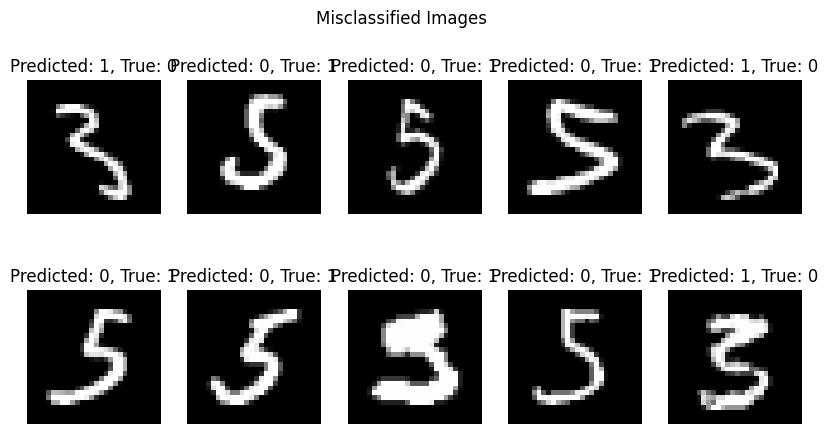

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Load data
df1 = pd.read_csv("/content/mnist_3_and_5.csv")

#Extract features and labels
X1 = df1.drop(columns=["label"]).values # 784 pixels per image
y1 = df1["label"].values

#Convert labels to binary (3 -> 0, 5 -> 1)
y1 = np.where(y1 == 5, 1, 0)

#Initialize perceptron parameters
weights = np.zeros(X1.shape[1])
bias = 0
learning_rate = 0.1
epochs = 100

def train_perceptron(X, y, weights, bias, learning_rate=0.1, epochs=100):
  """
  Train a perceptron using the Perceptron Learning Alogrithm.

  Parameters:
  - X: Input features (n_samples, n_features)
  - y: Traget labels (binary: 0 or 1)
  - weights: Initial weights (n_features,)
  - bias: Initial bias value (scalar)
  - learning_rate: Learning rate
  - epochs: Number of iterations

  Returns:
  - Updated weights, bias, and accuracy
  """
  n_samples = X.shape[0]

  for epoch in range(epochs):
    correct_predictions = 0

    for i in range(n_samples):
      #Compute the output using step function
      linear_output = np.dot(X[i], weights) + bias
      y_pred = 1 if linear_output >= 0 else 0

      #Update weights if misclassified
      if y_pred != y[i]:
        update = learning_rate * (y[i] - y_pred)
        weights += update * X[i]
        bias += update
      else:
        correct_predictions += 1

    #Calculate accuracy
    accuracy = correct_predictions /n_samples
    if epoch % 10 == 0 or epoch == epoch - 1:
      print(f"Epoch {epoch + 1}/{epochs} - Accuracy: {accuracy:.4f}")

  return weights, bias, accuracy

#Train the perceptron
weights, bias, accuracy = train_perceptron(X1, y1, weights, bias, learning_rate, epochs)

print("The Final Accuracy is: ", accuracy)

#Get predictions using the preceptron decision function
predictions = np.dot(X1, weights) + bias
y_pred = np.where(predictions >= 0, 1, 0)

#Calculate final accuracy
final_accuracy = np.mean(y_pred == y1)
print(f"Final Accuracy: {final_accuracy:.4f}")

#Step 5: Visualize Misclassified Images with Labels
misclassified_idx = np.where(y_pred != y1)[0]

if len(misclassified_idx) > 0:
  fig, axes = plt.subplots(2, 5, figsize=(10, 5))
  for ax, idx in zip(axes.flat, misclassified_idx[:10]): #Show 10 misclassified images
    ax.imshow(X1[idx].reshape(28, 28), cmap="gray")
    #Format the title as "Predicted: 3, True: 5"
    ax.set_title(f"Predicted: {y_pred[idx]}, True: {y1[idx]}")
    ax.axis("off")
  plt.suptitle("Misclassified Images")
  plt.show()
else:
  print("All images were correctly classified!")